In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [177]:
#Please load the Data Set uploaded with other files, because we have added another field to the data set - Combined Performance
#Combined performance is the average of Previous 5 years rating or is equal to performance rating if value in all the 
#previous 5 years is 0

data = pd.read_csv("attrition_data (1).csv")

In [178]:
data.head()

,EMP_ID,ANNUAL_RATE,HRLY_RATE,JOBCODE,ETHNICITY,SEX,MARITAL_STATUS,JOB_SATISFACTION,AGE,NUMBER_OF_TEAM_CHANGED,...,DISABLED_VET,EDUCATION_LEVEL,STATUS,JOB_GROUP,PREVYR_1,PREVYR_2,PREVYR_3,PREVYR_4,PREVYR_5,COMBINED PERFORMANCE
0,3285941608,33615,22,71850,BLACK,F,Divorced,4,35,3+,...,N,LEVEL 2,T,Plant & Facilities Maintenance,0,0,0,0,0,4.0
1,3687079832,70675,40,59806,ASIAN,M,Single,3,18,3+,...,N,LEVEL 1,A,Customer Care,3,3,3,2,3,2.8
2,7209970080,34320,23,60311,WHITE,F,Single,5,18,2,...,N,LEVEL 1,A,Customer Care,3,3,3,2,3,2.8
3,9084013977,103199,59,16233,ASIAN,F,Single,2,50,0,...,N,LEVEL 1,T,Finance,0,0,0,0,0,2.0
4,4566148978,141801,71,64415,ASIAN,F,Single,4,34,3,...,N,LEVEL 1,A,Marketing - Direct,2,2,2,2,2,2.0


In [179]:
Y=data["STATUS"]

In [180]:
Y = pd.get_dummies(Y,drop_first=True)

In [181]:
bins = [17, 25, 30, 35, 40,np.inf]
names = ['18-24', '24-29', '30-34', '35-39', '40+']
data['AGE'] = pd.cut(data['AGE'], bins, labels=names)

In [182]:
data.head()

,EMP_ID,ANNUAL_RATE,HRLY_RATE,JOBCODE,ETHNICITY,SEX,MARITAL_STATUS,JOB_SATISFACTION,AGE,NUMBER_OF_TEAM_CHANGED,...,DISABLED_VET,EDUCATION_LEVEL,STATUS,JOB_GROUP,PREVYR_1,PREVYR_2,PREVYR_3,PREVYR_4,PREVYR_5,COMBINED PERFORMANCE
0,3285941608,33615,22,71850,BLACK,F,Divorced,4,30-34,3+,...,N,LEVEL 2,T,Plant & Facilities Maintenance,0,0,0,0,0,4.0
1,3687079832,70675,40,59806,ASIAN,M,Single,3,18-24,3+,...,N,LEVEL 1,A,Customer Care,3,3,3,2,3,2.8
2,7209970080,34320,23,60311,WHITE,F,Single,5,18-24,2,...,N,LEVEL 1,A,Customer Care,3,3,3,2,3,2.8
3,9084013977,103199,59,16233,ASIAN,F,Single,2,40+,0,...,N,LEVEL 1,T,Finance,0,0,0,0,0,2.0
4,4566148978,141801,71,64415,ASIAN,F,Single,4,30-34,3,...,N,LEVEL 1,A,Marketing - Direct,2,2,2,2,2,2.0


# CONCATINATING DUMMY VARIABLES

In [183]:
data = pd.concat([data,pd.get_dummies(data['AGE'], prefix='AGE',drop_first=True)],axis=1)


In [184]:
data = pd.concat([data,pd.get_dummies(data['ETHNICITY'], prefix='ethnicity',drop_first=True)],axis=1)


In [185]:
data = pd.concat([data,pd.get_dummies(data['SEX'], prefix='SEX',drop_first=True)],axis=1)


In [186]:
data = pd.concat([data,pd.get_dummies(data['MARITAL_STATUS'], prefix='MARRY_STA',drop_first=True)],axis=1)


In [187]:
data = pd.concat([data,pd.get_dummies(data['REHIRE'], prefix='REHIRE',drop_first=True)],axis=1)


In [188]:
data = pd.concat([data,pd.get_dummies(data['IS_FIRST_JOB'], prefix='FIRSTJOB',drop_first=True)],axis=1)


In [189]:
data = pd.concat([data,pd.get_dummies(data['TRAVELLED_REQUIRED'], prefix='TRAVELLED_REQUIRED',drop_first=True)],axis=1)


In [190]:
data = pd.concat([data,pd.get_dummies(data['DISABLED_EMP'], prefix='DISABLED_EMP',drop_first=True)],axis=1)


In [191]:
data = pd.concat([data,pd.get_dummies(data['DISABLED_VET'], prefix='DISABLED_VET',drop_first=True)],axis=1)


In [192]:
data = pd.concat([data,pd.get_dummies(data['JOB_GROUP'], prefix='JOB_GROUP',drop_first=True)],axis=1)


In [193]:
data['REFERRAL_SOURCE'].fillna('Unknown',inplace=True)
data = pd.concat([data,pd.get_dummies(data['REFERRAL_SOURCE'], prefix='REFERRAL',drop_first=True)],axis=1)


In [194]:
data["NUMBER_OF_TEAM_CHANGED"]=data["NUMBER_OF_TEAM_CHANGED"].astype("category").cat.codes

In [195]:
data["EDUCATION_LEVEL"]=data["EDUCATION_LEVEL"].astype("category").cat.codes

In [196]:
data.head()

,EMP_ID,ANNUAL_RATE,HRLY_RATE,JOBCODE,ETHNICITY,SEX,MARITAL_STATUS,JOB_SATISFACTION,AGE,NUMBER_OF_TEAM_CHANGED,...,REFERRAL_Inroads,REFERRAL_Job Boards/Online Advertising,REFERRAL_Job Fair,REFERRAL_Job Posting,REFERRAL_Open House,REFERRAL_Other Source,REFERRAL_Print Advertisement,REFERRAL_Staffing Agency,REFERRAL_Unknown,REFERRAL_Unsolicited
0,3285941608,33615,22,71850,BLACK,F,Divorced,4,30-34,4,...,0,0,0,0,0,0,0,0,0,0
1,3687079832,70675,40,59806,ASIAN,M,Single,3,18-24,4,...,0,0,0,0,0,0,0,0,0,0
2,7209970080,34320,23,60311,WHITE,F,Single,5,18-24,2,...,0,0,0,0,0,0,0,0,0,0
3,9084013977,103199,59,16233,ASIAN,F,Single,2,40+,0,...,0,0,0,0,0,0,0,0,0,0
4,4566148978,141801,71,64415,ASIAN,F,Single,4,30-34,3,...,1,0,0,0,0,0,0,0,0,0


# DROPPING DATA FROM ORIGINAL DATASET THAT HAVE BEEN CONVERTED TO CATEGORY

In [197]:
data.drop(["ETHNICITY","SEX","MARITAL_STATUS","HIRE_MONTH","TERMINATION_YEAR","JOB_GROUP"],axis=1,inplace=True)

In [198]:
data.drop(["IS_FIRST_JOB","TRAVELLED_REQUIRED","AGE"],axis=1,inplace=True)

In [199]:
data.drop(["REFERRAL_SOURCE"],axis=1,inplace=True)

In [200]:
data.drop(["REHIRE"],axis=1,inplace=True)

In [201]:
data.drop(["DISABLED_EMP","DISABLED_VET"],axis=1,inplace=True)

In [202]:
data.drop(["PREVYR_1","PREVYR_2","PREVYR_3","PREVYR_4","PREVYR_5"],axis=1,inplace=True)

In [203]:
data.drop("JOBCODE",axis=1,inplace = True)

In [204]:
data.drop("EMP_ID",axis = 1, inplace = True)

In [205]:
data.head()

,ANNUAL_RATE,HRLY_RATE,JOB_SATISFACTION,NUMBER_OF_TEAM_CHANGED,PERFORMANCE_RATING,EDUCATION_LEVEL,STATUS,COMBINED PERFORMANCE,AGE_24-29,AGE_30-34,...,REFERRAL_Inroads,REFERRAL_Job Boards/Online Advertising,REFERRAL_Job Fair,REFERRAL_Job Posting,REFERRAL_Open House,REFERRAL_Other Source,REFERRAL_Print Advertisement,REFERRAL_Staffing Agency,REFERRAL_Unknown,REFERRAL_Unsolicited
0,33615,22,4,4,4,1,T,4.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,70675,40,3,4,3,0,A,2.8,0,0,...,0,0,0,0,0,0,0,0,0,0
2,34320,23,5,2,3,0,A,2.8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,103199,59,2,0,2,0,T,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,141801,71,4,3,4,0,A,2.0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [206]:
data.drop_duplicates(inplace=True)

In [207]:
data.drop_duplicates(inplace=True)

In [208]:
x = data

In [209]:
x.drop(["STATUS"],axis=1,inplace=True)

In [210]:
len(x.columns)

109

In [211]:
x.head()
x.dropna(inplace = True)


In [212]:
x.head()

,ANNUAL_RATE,HRLY_RATE,JOB_SATISFACTION,NUMBER_OF_TEAM_CHANGED,PERFORMANCE_RATING,EDUCATION_LEVEL,COMBINED PERFORMANCE,AGE_24-29,AGE_30-34,AGE_35-39,...,REFERRAL_Inroads,REFERRAL_Job Boards/Online Advertising,REFERRAL_Job Fair,REFERRAL_Job Posting,REFERRAL_Open House,REFERRAL_Other Source,REFERRAL_Print Advertisement,REFERRAL_Staffing Agency,REFERRAL_Unknown,REFERRAL_Unsolicited
0,33615,22,4,4,4,1,4.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,70675,40,3,4,3,0,2.8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,34320,23,5,2,3,0,2.8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,103199,59,2,0,2,0,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,141801,71,4,3,4,0,2.0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


# STANDARDIZING THE DATA

In [213]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

cols = x.columns

np_scaled = StandardScaler().fit_transform(x)
df_stn = pd.DataFrame(np_scaled, columns = cols)
df_stn

,ANNUAL_RATE,HRLY_RATE,JOB_SATISFACTION,NUMBER_OF_TEAM_CHANGED,PERFORMANCE_RATING,EDUCATION_LEVEL,COMBINED PERFORMANCE,AGE_24-29,AGE_30-34,AGE_35-39,...,REFERRAL_Inroads,REFERRAL_Job Boards/Online Advertising,REFERRAL_Job Fair,REFERRAL_Job Posting,REFERRAL_Open House,REFERRAL_Other Source,REFERRAL_Print Advertisement,REFERRAL_Staffing Agency,REFERRAL_Unknown,REFERRAL_Unsolicited
0,-0.954480,-0.993149,0.880473,1.596572,0.709336,-0.289507,1.238274,-0.357822,2.778907,-0.352995,...,-0.225469,-0.237444,-0.233011,-0.225214,-0.228005,-0.229516,-0.217718,-0.236955,-0.324751,-0.222653
1,-0.320221,-0.353641,0.171848,1.596572,-0.001479,-1.085714,0.098658,-0.357822,-0.359854,-0.352995,...,-0.225469,-0.237444,-0.233011,-0.225214,-0.228005,-0.229516,-0.217718,-0.236955,-0.324751,-0.222653
2,-0.942414,-0.957621,1.589098,0.181323,-0.001479,-1.085714,0.098658,-0.357822,-0.359854,-0.352995,...,-0.225469,-0.237444,-0.233011,-0.225214,-0.228005,-0.229516,-0.217718,-0.236955,-0.324751,-0.222653
3,0.236407,0.321395,-0.536777,-1.233926,-0.712294,-1.085714,-0.661086,-0.357822,-0.359854,-0.352995,...,-0.225469,-0.237444,-0.233011,-0.225214,-0.228005,-0.229516,-0.217718,-0.236955,-0.324751,-0.222653
4,0.897057,0.747734,0.880473,0.888948,0.709336,-1.085714,-0.661086,-0.357822,2.778907,-0.352995,...,4.435196,-0.237444,-0.233011,-0.225214,-0.228005,-0.229516,-0.217718,-0.236955,-0.324751,-0.222653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9607,-0.937006,-0.957621,-1.245402,-1.233926,-1.423109,-1.085714,-1.610766,-0.357822,-0.359854,-0.352995,...,-0.225469,-0.237444,-0.233011,-0.225214,-0.228005,-0.229516,-0.217718,4.220210,-0.324751,-0.222653
9608,-0.931426,-0.815508,1.589098,0.181323,-1.423109,0.506700,-1.610766,2.794685,-0.359854,-0.352995,...,-0.225469,-0.237444,-0.233011,-0.225214,-0.228005,-0.229516,-0.217718,-0.236955,3.079287,-0.222653
9609,-0.857424,-0.815508,0.171848,0.181323,-1.423109,0.506700,-1.610766,-0.357822,2.778907,-0.352995,...,-0.225469,-0.237444,-0.233011,-0.225214,-0.228005,-0.229516,-0.217718,-0.236955,-0.324751,-0.222653
9610,-0.859837,-0.815508,0.880473,1.596572,0.709336,-0.289507,1.238274,-0.357822,2.778907,-0.352995,...,-0.225469,-0.237444,-0.233011,-0.225214,4.385862,-0.229516,-0.217718,-0.236955,-0.324751,-0.222653


In [214]:
colss=df_stn.columns

In [215]:
df_stnd = sm.add_constant(df_stn)

C:\Users\risha\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [216]:
df_stnd

,const,ANNUAL_RATE,HRLY_RATE,JOB_SATISFACTION,NUMBER_OF_TEAM_CHANGED,PERFORMANCE_RATING,EDUCATION_LEVEL,COMBINED PERFORMANCE,AGE_24-29,AGE_30-34,...,REFERRAL_Inroads,REFERRAL_Job Boards/Online Advertising,REFERRAL_Job Fair,REFERRAL_Job Posting,REFERRAL_Open House,REFERRAL_Other Source,REFERRAL_Print Advertisement,REFERRAL_Staffing Agency,REFERRAL_Unknown,REFERRAL_Unsolicited
0,1.0,-0.954480,-0.993149,0.880473,1.596572,0.709336,-0.289507,1.238274,-0.357822,2.778907,...,-0.225469,-0.237444,-0.233011,-0.225214,-0.228005,-0.229516,-0.217718,-0.236955,-0.324751,-0.222653
1,1.0,-0.320221,-0.353641,0.171848,1.596572,-0.001479,-1.085714,0.098658,-0.357822,-0.359854,...,-0.225469,-0.237444,-0.233011,-0.225214,-0.228005,-0.229516,-0.217718,-0.236955,-0.324751,-0.222653
2,1.0,-0.942414,-0.957621,1.589098,0.181323,-0.001479,-1.085714,0.098658,-0.357822,-0.359854,...,-0.225469,-0.237444,-0.233011,-0.225214,-0.228005,-0.229516,-0.217718,-0.236955,-0.324751,-0.222653
3,1.0,0.236407,0.321395,-0.536777,-1.233926,-0.712294,-1.085714,-0.661086,-0.357822,-0.359854,...,-0.225469,-0.237444,-0.233011,-0.225214,-0.228005,-0.229516,-0.217718,-0.236955,-0.324751,-0.222653
4,1.0,0.897057,0.747734,0.880473,0.888948,0.709336,-1.085714,-0.661086,-0.357822,2.778907,...,4.435196,-0.237444,-0.233011,-0.225214,-0.228005,-0.229516,-0.217718,-0.236955,-0.324751,-0.222653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9607,1.0,-0.937006,-0.957621,-1.245402,-1.233926,-1.423109,-1.085714,-1.610766,-0.357822,-0.359854,...,-0.225469,-0.237444,-0.233011,-0.225214,-0.228005,-0.229516,-0.217718,4.220210,-0.324751,-0.222653
9608,1.0,-0.931426,-0.815508,1.589098,0.181323,-1.423109,0.506700,-1.610766,2.794685,-0.359854,...,-0.225469,-0.237444,-0.233011,-0.225214,-0.228005,-0.229516,-0.217718,-0.236955,3.079287,-0.222653
9609,1.0,-0.857424,-0.815508,0.171848,0.181323,-1.423109,0.506700,-1.610766,-0.357822,2.778907,...,-0.225469,-0.237444,-0.233011,-0.225214,-0.228005,-0.229516,-0.217718,-0.236955,-0.324751,-0.222653
9610,1.0,-0.859837,-0.815508,0.880473,1.596572,0.709336,-0.289507,1.238274,-0.357822,2.778907,...,-0.225469,-0.237444,-0.233011,-0.225214,4.385862,-0.229516,-0.217718,-0.236955,-0.324751,-0.222653


# OLS SUMMARY OF ALL VARIABLES

In [217]:
model=sm.OLS(Y,df_stnd).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      T   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     23.07
Date:                Fri, 08 May 2020   Prob (F-statistic):               0.00
Time:                        16:21:33   Log-Likelihood:                -5775.5
No. Observations:                9612   AIC:                         1.177e+04
Df Residuals:                    9502   BIC:                         1.256e+04
Df Model:                         109                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.4388      0.005     96.936      0.000       0.430       0.448
ANNUAL_RATE                                 -0.1141      0.064     -1.781      0.075      -0.240       0.011
HRLY_RATE                                   -0.0115      0.064     -0.181      0.857      -0.137       0.114
JOB_SATISFACTION                            -0.0012      0.009     -0.132      0.895      -0.018       0.016
NUMBER_OF_TEAM_CHANGED                       0.0121      0.009      1.390      0.165      -0.005       0.029
PERFORMANCE_RATING                          -0.0100      0.005     -1.815      0.069      -0.021       0.001
EDUCATION_LEVEL                              0.0056      0.005      1.174      0.240      -0.004       0.015
COMBINED PERFORMANCE                         0.0210      0.006      3.743      0.000       0.010       0.032
AGE_24-29                                -8.117e-05      0.006     -0.014      0.989      -0.011       0.011
AGE_30-34                                    0.0032      0.006      0.548      0.583      -0.008       0.015
AGE_35-39                                    0.0090      0.006      1.525      0.127      -0.003       0.021
AGE_40+                                      0.0231      0.012      1.903      0.057      -0.001       0.047
ethnicity_AMIND                             -0.0023      0.021     -0.105      0.916      -0.044       0.040
ethnicity_ASIAN                             -0.0444      0.157     -0.282      0.778      -0.353       0.264
ethnicity_BLACK                             -0.0394      0.143     -0.275      0.783      -0.320       0.241
ethnicity_HISPA                             -0.0379      0.141     -0.269      0.788      -0.314       0.238
ethnicity_PACIF                             -0.0128      0.026     -0.488      0.626      -0.064       0.039
ethnicity_TWO                               -0.0197      0.060     -0.328      0.743      -0.138       0.098
ethnicity_WHITE                             -0.0583      0.219     -0.266      0.790      -0.487       0.371
SEX_M                                       -0.0043      0.005     -0.941      0.347      -0.013       0.005
MARRY_STA_Married                           -0.0113      0.007     -1.593      0.111      -0.025       0.003
MARRY_STA_Single                            -0.0028      0.007     -0.394      0.694      -0.017       0.011
REHIRE_True                                 -0.0006      0.005     -0.129      0.897      -0.010       0.008
FIRSTJOB_Y                                   0.0029      0.005      0.551      0.582      -0.007       0.013
TRAVELLED_REQUIRED_Y                         0.0025      0.005      0.540      0.589      -0.006       0.011
DISABLED_EMP_Y                 

# BACKWARD ELIMINATION FOR ALL VARIABLES

In [218]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [219]:
elim = backward_elimination(df_stnd,Y)
elim

['const',
 'ANNUAL_RATE',
 'COMBINED PERFORMANCE',
 'AGE_40+',
 'MARRY_STA_Married',
 'JOB_GROUP_Accounts Payable',
 'JOB_GROUP_Advanced Research',
 'JOB_GROUP_Analytical/Microbiology',
 'JOB_GROUP_Applied Research',
 'JOB_GROUP_Brand Operations',
 'JOB_GROUP_Creative Service/Copy',
 'JOB_GROUP_Demand Planning',
 'JOB_GROUP_Demi-Grand',
 'JOB_GROUP_Digital',
 'JOB_GROUP_Distribution/Administration',
 'JOB_GROUP_Engineering',
 'JOB_GROUP_Finance',
 'JOB_GROUP_General Administration',
 'JOB_GROUP_General Management',
 'JOB_GROUP_Human Resources',
 'JOB_GROUP_IT Digital',
 'JOB_GROUP_IT Governance and Management',
 'JOB_GROUP_IT Technologies and Infrstrctr',
 'JOB_GROUP_Industrial Quality',
 'JOB_GROUP_Integrated Marketing Comm',
 'JOB_GROUP_Integrated Mktg Communications',
 'JOB_GROUP_Legal',
 'JOB_GROUP_Logistics - Distribution',
 'JOB_GROUP_Logistics - Manufacturing',
 'JOB_GROUP_Market Research',
 'JOB_GROUP_Marketing - Direct',
 'JOB_GROUP_Marketing - Global',
 'JOB_GROUP_Marketing S

In [220]:
len(elim)

49

# NEW DATA FRAME CONSISTING OF ONLY SIGNIFICANT VARIABLES

In [221]:
new_df =df_stnd[['const',
 'ANNUAL_RATE',
 'COMBINED PERFORMANCE',
 'AGE_40+',
 'MARRY_STA_Married',
 'JOB_GROUP_Accounts Payable',
 'JOB_GROUP_Advanced Research',
 'JOB_GROUP_Analytical/Microbiology',
 'JOB_GROUP_Applied Research',
 'JOB_GROUP_Brand Operations',
 'JOB_GROUP_Creative Service/Copy',
 'JOB_GROUP_Demand Planning',
 'JOB_GROUP_Demi-Grand',
 'JOB_GROUP_Digital',
 'JOB_GROUP_Distribution/Administration',
 'JOB_GROUP_Engineering',
 'JOB_GROUP_Finance',
 'JOB_GROUP_General Administration',
 'JOB_GROUP_General Management',
 'JOB_GROUP_Human Resources',
 'JOB_GROUP_IT Digital',
 'JOB_GROUP_IT Governance and Management',
 'JOB_GROUP_IT Technologies and Infrstrctr',
 'JOB_GROUP_Industrial Quality',
 'JOB_GROUP_Integrated Marketing Comm',
 'JOB_GROUP_Integrated Mktg Communications',
 'JOB_GROUP_Legal',
 'JOB_GROUP_Logistics - Distribution',
 'JOB_GROUP_Logistics - Manufacturing',
 'JOB_GROUP_Market Research',
 'JOB_GROUP_Marketing - Direct',
 'JOB_GROUP_Marketing - Global',
 'JOB_GROUP_Marketing Support/Services',
 'JOB_GROUP_Package Development',
 'JOB_GROUP_Physical Flows',
 'JOB_GROUP_Plant & Facilities Maintenance',
 'JOB_GROUP_Prod Planning & Inventory Ctl',
 'JOB_GROUP_Production & Operations',
 'JOB_GROUP_Promotional Purchasing',
 'JOB_GROUP_Quality Assurance',
 'JOB_GROUP_R&I Development/Pre-Develpmnt',
 'JOB_GROUP_R&I Evaluation',
 'JOB_GROUP_R&I General Management',
 'JOB_GROUP_Sourcing',
 'JOB_GROUP_Technical Packaging',
 'JOB_GROUP_Transportation & Warehousing',
 'JOB_GROUP_Web',
 'REFERRAL_E-Strat',
 'REFERRAL_Former Employee/Intern']]

In [222]:
new_df

,const,ANNUAL_RATE,COMBINED PERFORMANCE,AGE_40+,MARRY_STA_Married,JOB_GROUP_Accounts Payable,JOB_GROUP_Advanced Research,JOB_GROUP_Analytical/Microbiology,JOB_GROUP_Applied Research,JOB_GROUP_Brand Operations,...,JOB_GROUP_Quality Assurance,JOB_GROUP_R&I Development/Pre-Develpmnt,JOB_GROUP_R&I Evaluation,JOB_GROUP_R&I General Management,JOB_GROUP_Sourcing,JOB_GROUP_Technical Packaging,JOB_GROUP_Transportation & Warehousing,JOB_GROUP_Web,REFERRAL_E-Strat,REFERRAL_Former Employee/Intern
0,1.0,-0.954480,1.238274,-0.951249,-0.849140,-0.077915,-0.055954,-0.048975,-0.055011,-0.040833,...,-0.070098,-0.163413,-0.093894,-0.163413,-0.154114,-0.152693,-0.044504,-0.062163,-0.22851,-0.229767
1,1.0,-0.320221,0.098658,-0.951249,-0.849140,-0.077915,-0.055954,-0.048975,-0.055011,-0.040833,...,-0.070098,-0.163413,-0.093894,-0.163413,-0.154114,-0.152693,-0.044504,-0.062163,-0.22851,-0.229767
2,1.0,-0.942414,0.098658,-0.951249,-0.849140,-0.077915,-0.055954,-0.048975,-0.055011,-0.040833,...,-0.070098,-0.163413,-0.093894,-0.163413,-0.154114,-0.152693,-0.044504,-0.062163,-0.22851,4.352230
3,1.0,0.236407,-0.661086,1.051249,-0.849140,-0.077915,-0.055954,-0.048975,-0.055011,-0.040833,...,-0.070098,-0.163413,-0.093894,-0.163413,-0.154114,-0.152693,-0.044504,-0.062163,-0.22851,-0.229767
4,1.0,0.897057,-0.661086,-0.951249,-0.849140,-0.077915,-0.055954,-0.048975,-0.055011,-0.040833,...,-0.070098,-0.163413,-0.093894,-0.163413,-0.154114,-0.152693,-0.044504,-0.062163,-0.22851,-0.229767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9607,1.0,-0.937006,-1.610766,1.051249,-0.849140,-0.077915,-0.055954,-0.048975,-0.055011,-0.040833,...,-0.070098,-0.163413,-0.093894,-0.163413,-0.154114,-0.152693,-0.044504,-0.062163,-0.22851,-0.229767
9608,1.0,-0.931426,-1.610766,-0.951249,-0.849140,-0.077915,-0.055954,-0.048975,-0.055011,-0.040833,...,-0.070098,-0.163413,-0.093894,-0.163413,-0.154114,-0.152693,-0.044504,-0.062163,-0.22851,-0.229767
9609,1.0,-0.857424,-1.610766,-0.951249,-0.849140,-0.077915,-0.055954,-0.048975,-0.055011,-0.040833,...,-0.070098,-0.163413,-0.093894,-0.163413,-0.154114,-0.152693,-0.044504,-0.062163,-0.22851,-0.229767
9610,1.0,-0.859837,1.238274,-0.951249,1.177662,-0.077915,-0.055954,-0.048975,-0.055011,-0.040833,...,-0.070098,-0.163413,-0.093894,-0.163413,-0.154114,-0.152693,-0.044504,-0.062163,-0.22851,-0.229767


# OLS SUMMARY ON SIGNIFICANT VARIABLES

In [223]:
model_1=sm.OLS(Y,new_df).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      T   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     51.54
Date:                Fri, 08 May 2020   Prob (F-statistic):               0.00
Time:                        16:21:50   Log-Likelihood:                -5798.2
No. Observations:                9612   AIC:                         1.169e+04
Df Residuals:                    9563   BIC:                         1.205e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.4388      0.005     97.018      0.000       0.430       0.448
ANNUAL_RATE                                 -0.1315      0.006    -21.537      0.000      -0.143      -0.120
COMBINED PERFORMANCE                         0.0151      0.005      3.258      0.001       0.006       0.024
AGE_40+                                      0.0097      0.005      2.117      0.034       0.001       0.019
MARRY_STA_Married                           -0.0090      0.005     -1.973      0.049      -0.018   -5.84e-05
JOB_GROUP_Accounts Payable                  -0.0137      0.005     -2.975      0.003      -0.023      -0.005
JOB_GROUP_Advanced Research                 -0.0102      0.005     -2.224      0.026      -0.019      -0.001
JOB_GROUP_Analytical/Microbiology           -0.0118      0.005     -2.601      0.009      -0.021      -0.003
JOB_GROUP_Applied Research                  -0.0094      0.005     -2.056      0.040      -0.018      -0.000
JOB_GROUP_Brand Operations                   0.0276      0.005      6.072      0.000       0.019       0.037
JOB_GROUP_Creative Service/Copy              0.0305      0.005      6.316      0.000       0.021       0.040
JOB_GROUP_Demand Planning                    0.0260      0.005      5.564      0.000       0.017       0.035
JOB_GROUP_Demi-Grand                        -0.0124      0.005     -2.730      0.006      -0.021      -0.004
JOB_GROUP_Digital                            0.0256      0.005      5.309      0.000       0.016       0.035
JOB_GROUP_Distribution/Administration        0.0698      0.005     14.669      0.000       0.060       0.079
JOB_GROUP_Engineering                        0.0357      0.005      7.696      0.000       0.027       0.045
JOB_GROUP_Finance                            0.0639      0.005     12.459      0.000       0.054       0.074
JOB_GROUP_General Administration             0.0242      0.005      4.881      0.000       0.014       0.034
JOB_GROUP_General Management                 0.0584      0.005     10.783      0.000       0.048       0.069
JOB_GROUP_Human Resources                    0.0289      0.005      5.783      0.000       0.019       0.039
JOB_GROUP_IT Digital                        -0.0096      0.005     -2.107      0.035      -0.019      -0.001
JOB_GROUP_IT Governance and Management       0.0567      0.005     12.072      0.000       0.047       0.066
JOB_GROUP_IT Technologies and Infrstrctr    -0.0110      0.005     -2.392      0.017      -0.020      -0.002
JOB_GROUP_Industrial Quality                -0.0134      0.005     -2.769      0.006      -0.023      -0.004
JOB_GROUP_Integrated Marketing Comm          0.0101      0.005      2.234      0.025       0.001       0.019
JOB_GROUP_Integrated Mktg Commu

# VIF ANALYSIS ON  ALL VARIABLES

In [224]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [225]:
vif_full = pd.DataFrame()
vif_full["variables"] = df_stn.columns
vif_full["VIF"] = [variance_inflation_factor(df_stn.values, i) for i in range(df_stn.shape[1])]

In [226]:
vif_great_full = vif_full[vif_full["VIF"]>5]
vif_great_full

,variables,VIF
0,ANNUAL_RATE,200.386533
1,HRLY_RATE,199.251964
10,AGE_40+,7.214243
11,ethnicity_AMIND,22.319795
12,ethnicity_ASIAN,1210.123672
13,ethnicity_BLACK,996.882155
14,ethnicity_HISPA,966.117606
15,ethnicity_PACIF,33.429502
16,ethnicity_TWO,176.774855
17,ethnicity_WHITE,2336.904031


# VIF ANALYSIS ON SIGNIFICANT VARIABLES

In [227]:
vif = pd.DataFrame()
vif["variables"] = new_df.columns
vif["VIF"] = [variance_inflation_factor(new_df.values, i) for i in range(new_df.shape[1])]

In [228]:
vif_great = vif[vif["VIF"]>1.5]

In [229]:
vif_great

,variables,VIF
1,ANNUAL_RATE,1.821788
34,JOB_GROUP_Physical Flows,1.508473
37,JOB_GROUP_Production & Operations,1.910816


In [230]:
from sklearn.decomposition import PCA


In [231]:
new_df.drop("const",axis =1,inplace=True )

C:\Users\risha\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [232]:
from sklearn.model_selection import train_test_split

In [233]:
X_train, X_test, y_train, y_test = train_test_split(new_df, Y, test_size=0.3, random_state=42)

# PCA POST BACKWARD ELIMINATION AND RAN 4 ALGOS ON THOSE (RANDOM FOREST,SVC,LOGISTIC REG,XGBOOST)

In [234]:
pca = PCA(n_components=0.80)

In [235]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [236]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

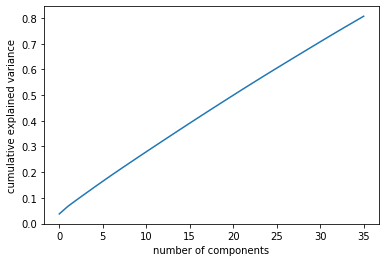

In [237]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [238]:
print('Variance ratio of each pc:\n', pca.explained_variance_ratio_, '\n')
print('Explained variance of each pc:\n', pca.explained_variance_, '\n')
print('Selected {} pcs'.format(pca.n_components_))



Variance ratio of each pc:
 [0.0374697  0.02983407 0.02487613 0.02434662 0.02414374 0.0238931
 0.02358275 0.02307246 0.02288566 0.02275091 0.02256999 0.022397
 0.02235743 0.02231776 0.02217508 0.02209376 0.02200792 0.02183784
 0.02175428 0.0215788  0.02153114 0.02149764 0.0212146  0.02109204
 0.02095564 0.02069348 0.02066095 0.02057433 0.02044445 0.02043398
 0.02040194 0.02031561 0.02007998 0.0198389  0.01970064 0.01964595] 

Explained variance of each pc:
 [1.79497693 1.42919407 1.19168533 1.16631927 1.15660033 1.14459325
 1.12972606 1.10528056 1.09633221 1.08987683 1.08121005 1.07292298
 1.07102731 1.06912707 1.06229195 1.05839643 1.05428398 1.04613667
 1.04213372 1.03372723 1.03144439 1.02983926 1.01628061 1.01040943
 1.00387503 0.99131616 0.98975795 0.98560858 0.97938647 0.97888479
 0.9773503  0.97321457 0.96192665 0.95037765 0.94375437 0.94113476] 

Selected 36 pcs


# LOG REGRESSION POST PCA

In [239]:
from sklearn.linear_model import LogisticRegression


In [240]:
lg = LogisticRegression(C = 0.01, solver = 'lbfgs', max_iter = 1000)
lg.fit(X_train_pca, y_train)

C:\Users\risha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [241]:
predict = lg.predict(X_test_pca)

In [242]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

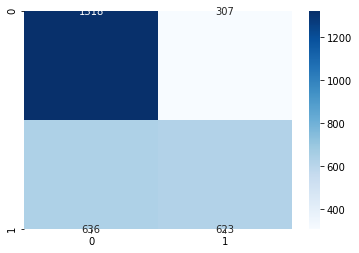

In [243]:
sns.heatmap(confusion_matrix(y_test,predict),annot=True,fmt='g',cmap='Blues')

In [244]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.67      0.81      0.74      1625
           1       0.67      0.49      0.57      1259

    accuracy                           0.67      2884
   macro avg       0.67      0.65      0.65      2884
weighted avg       0.67      0.67      0.66      2884



In [245]:
print("acc",accuracy_score(y_test,predict))

acc 0.6730235783633842


# XG BOOST POST PCA

In [246]:
from xgboost import XGBClassifier


In [247]:
model = XGBClassifier()
model.fit(X_train_pca, y_train)


C:\Users\risha\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\risha\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [248]:
xg_predict = model.predict(X_test_pca)


In [249]:
x = ["Predicted"]
y = ["Actual"]

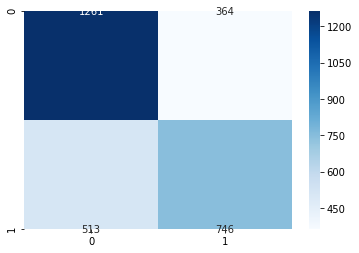

In [250]:
sns.heatmap(confusion_matrix(y_test,xg_predict),annot=True,fmt='g',cmap='Blues')

In [251]:
confusion_matrix(y_test,xg_predict)
print(classification_report(y_test,xg_predict))
print("acc",accuracy_score(y_test,xg_predict))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      1625
           1       0.67      0.59      0.63      1259

    accuracy                           0.70      2884
   macro avg       0.69      0.68      0.69      2884
weighted avg       0.69      0.70      0.69      2884

acc 0.6959084604715673


# RANDOM FORERST POST PCA

In [252]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier().fit(X_train_pca,y_train)
rf_predict=RF.predict(X_test_pca)


C:\Users\risha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [253]:
print(confusion_matrix(y_test,rf_predict))
print(classification_report(y_test,rf_predict))
print("acc",accuracy_score(y_test,rf_predict))

[[1165  460]
 [ 510  749]]
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1625
           1       0.62      0.59      0.61      1259

    accuracy                           0.66      2884
   macro avg       0.66      0.66      0.66      2884
weighted avg       0.66      0.66      0.66      2884

acc 0.6636615811373093


# SVC POST PCA

In [254]:
from sklearn.svm import SVC

In [255]:
len(X_train.columns)

48

In [256]:
classifier_svm_kernel = SVC(C=5.0,kernel='rbf', gamma=0.12,tol=0.00001)
classifier_svm_kernel.fit(X_train_pca,y_train)



C:\Users\risha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=5.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.12, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=1e-05, verbose=False)

In [257]:
svm_pred = classifier_svm_kernel.predict(X_test_pca)


In [258]:
print(confusion_matrix(y_test,svm_pred))
print(classification_report(y_test,svm_pred))
print("acc",accuracy_score(y_test,svm_pred))

[[1293  332]
 [ 558  701]]
              precision    recall  f1-score   support

           0       0.70      0.80      0.74      1625
           1       0.68      0.56      0.61      1259

    accuracy                           0.69      2884
   macro avg       0.69      0.68      0.68      2884
weighted avg       0.69      0.69      0.69      2884

acc 0.6914008321775312


In [259]:
new_df

,ANNUAL_RATE,COMBINED PERFORMANCE,AGE_40+,MARRY_STA_Married,JOB_GROUP_Accounts Payable,JOB_GROUP_Advanced Research,JOB_GROUP_Analytical/Microbiology,JOB_GROUP_Applied Research,JOB_GROUP_Brand Operations,JOB_GROUP_Creative Service/Copy,...,JOB_GROUP_Quality Assurance,JOB_GROUP_R&I Development/Pre-Develpmnt,JOB_GROUP_R&I Evaluation,JOB_GROUP_R&I General Management,JOB_GROUP_Sourcing,JOB_GROUP_Technical Packaging,JOB_GROUP_Transportation & Warehousing,JOB_GROUP_Web,REFERRAL_E-Strat,REFERRAL_Former Employee/Intern
0,-0.954480,1.238274,-0.951249,-0.849140,-0.077915,-0.055954,-0.048975,-0.055011,-0.040833,-0.161727,...,-0.070098,-0.163413,-0.093894,-0.163413,-0.154114,-0.152693,-0.044504,-0.062163,-0.22851,-0.229767
1,-0.320221,0.098658,-0.951249,-0.849140,-0.077915,-0.055954,-0.048975,-0.055011,-0.040833,-0.161727,...,-0.070098,-0.163413,-0.093894,-0.163413,-0.154114,-0.152693,-0.044504,-0.062163,-0.22851,-0.229767
2,-0.942414,0.098658,-0.951249,-0.849140,-0.077915,-0.055954,-0.048975,-0.055011,-0.040833,-0.161727,...,-0.070098,-0.163413,-0.093894,-0.163413,-0.154114,-0.152693,-0.044504,-0.062163,-0.22851,4.352230
3,0.236407,-0.661086,1.051249,-0.849140,-0.077915,-0.055954,-0.048975,-0.055011,-0.040833,-0.161727,...,-0.070098,-0.163413,-0.093894,-0.163413,-0.154114,-0.152693,-0.044504,-0.062163,-0.22851,-0.229767
4,0.897057,-0.661086,-0.951249,-0.849140,-0.077915,-0.055954,-0.048975,-0.055011,-0.040833,-0.161727,...,-0.070098,-0.163413,-0.093894,-0.163413,-0.154114,-0.152693,-0.044504,-0.062163,-0.22851,-0.229767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9607,-0.937006,-1.610766,1.051249,-0.849140,-0.077915,-0.055954,-0.048975,-0.055011,-0.040833,-0.161727,...,-0.070098,-0.163413,-0.093894,-0.163413,-0.154114,-0.152693,-0.044504,-0.062163,-0.22851,-0.229767
9608,-0.931426,-1.610766,-0.951249,-0.849140,-0.077915,-0.055954,-0.048975,-0.055011,-0.040833,-0.161727,...,-0.070098,-0.163413,-0.093894,-0.163413,-0.154114,-0.152693,-0.044504,-0.062163,-0.22851,-0.229767
9609,-0.857424,-1.610766,-0.951249,-0.849140,-0.077915,-0.055954,-0.048975,-0.055011,-0.040833,-0.161727,...,-0.070098,-0.163413,-0.093894,-0.163413,-0.154114,-0.152693,-0.044504,-0.062163,-0.22851,-0.229767
9610,-0.859837,1.238274,-0.951249,1.177662,-0.077915,-0.055954,-0.048975,-0.055011,-0.040833,-0.161727,...,-0.070098,-0.163413,-0.093894,-0.163413,-0.154114,-0.152693,-0.044504,-0.062163,-0.22851,-0.229767


In [260]:
df_stn

,ANNUAL_RATE,HRLY_RATE,JOB_SATISFACTION,NUMBER_OF_TEAM_CHANGED,PERFORMANCE_RATING,EDUCATION_LEVEL,COMBINED PERFORMANCE,AGE_24-29,AGE_30-34,AGE_35-39,...,REFERRAL_Inroads,REFERRAL_Job Boards/Online Advertising,REFERRAL_Job Fair,REFERRAL_Job Posting,REFERRAL_Open House,REFERRAL_Other Source,REFERRAL_Print Advertisement,REFERRAL_Staffing Agency,REFERRAL_Unknown,REFERRAL_Unsolicited
0,-0.954480,-0.993149,0.880473,1.596572,0.709336,-0.289507,1.238274,-0.357822,2.778907,-0.352995,...,-0.225469,-0.237444,-0.233011,-0.225214,-0.228005,-0.229516,-0.217718,-0.236955,-0.324751,-0.222653
1,-0.320221,-0.353641,0.171848,1.596572,-0.001479,-1.085714,0.098658,-0.357822,-0.359854,-0.352995,...,-0.225469,-0.237444,-0.233011,-0.225214,-0.228005,-0.229516,-0.217718,-0.236955,-0.324751,-0.222653
2,-0.942414,-0.957621,1.589098,0.181323,-0.001479,-1.085714,0.098658,-0.357822,-0.359854,-0.352995,...,-0.225469,-0.237444,-0.233011,-0.225214,-0.228005,-0.229516,-0.217718,-0.236955,-0.324751,-0.222653
3,0.236407,0.321395,-0.536777,-1.233926,-0.712294,-1.085714,-0.661086,-0.357822,-0.359854,-0.352995,...,-0.225469,-0.237444,-0.233011,-0.225214,-0.228005,-0.229516,-0.217718,-0.236955,-0.324751,-0.222653
4,0.897057,0.747734,0.880473,0.888948,0.709336,-1.085714,-0.661086,-0.357822,2.778907,-0.352995,...,4.435196,-0.237444,-0.233011,-0.225214,-0.228005,-0.229516,-0.217718,-0.236955,-0.324751,-0.222653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9607,-0.937006,-0.957621,-1.245402,-1.233926,-1.423109,-1.085714,-1.610766,-0.357822,-0.359854,-0.352995,...,-0.225469,-0.237444,-0.233011,-0.225214,-0.228005,-0.229516,-0.217718,4.220210,-0.324751,-0.222653
9608,-0.931426,-0.815508,1.589098,0.181323,-1.423109,0.506700,-1.610766,2.794685,-0.359854,-0.352995,...,-0.225469,-0.237444,-0.233011,-0.225214,-0.228005,-0.229516,-0.217718,-0.236955,3.079287,-0.222653
9609,-0.857424,-0.815508,0.171848,0.181323,-1.423109,0.506700,-1.610766,-0.357822,2.778907,-0.352995,...,-0.225469,-0.237444,-0.233011,-0.225214,-0.228005,-0.229516,-0.217718,-0.236955,-0.324751,-0.222653
9610,-0.859837,-0.815508,0.880473,1.596572,0.709336,-0.289507,1.238274,-0.357822,2.778907,-0.352995,...,-0.225469,-0.237444,-0.233011,-0.225214,4.385862,-0.229516,-0.217718,-0.236955,-0.324751,-0.222653


# FEATURE SELECTION ON ALL COLUMNS

In [261]:
len(df_stn.columns)

109

C:\Users\risha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


[7.87734082e-02 7.71770912e-02 3.72391443e-02 3.72464455e-02
 4.13123610e-02 4.26816233e-02 4.86111823e-02 1.13471966e-02
 1.13839652e-02 1.18079407e-02 1.25750019e-02 6.56086133e-04
 1.33679920e-02 1.27867270e-02 1.21036628e-02 1.50565210e-03
 3.61052005e-03 2.03879841e-02 2.63324620e-02 1.97873852e-02
 2.01346066e-02 1.37358353e-02 7.93450592e-03 1.90599252e-02
 1.37897590e-02 1.40533794e-02 1.52361469e-03 1.22937273e-03
 9.80229319e-04 1.07100843e-03 2.03691307e-03 2.26157183e-04
 5.82949391e-04 4.24800812e-03 4.67547541e-03 1.15180783e-03
 2.73901860e-03 8.05140636e-04 3.65717252e-03 1.75299696e-02
 3.38859655e-03 6.06144791e-03 1.14697992e-03 4.22289925e-03
 8.97430787e-04 5.08090356e-03 1.95669803e-04 2.04021848e-03
 1.56945947e-03 6.08051508e-03 1.69487424e-04 2.02866700e-03
 3.77712640e-03 1.33356740e-05 1.50347805e-04 3.82476443e-03
 3.18488961e-04 1.17731459e-03 2.65141201e-03 4.01987915e-03
 3.55033932e-03 2.14108739e-03 2.81417686e-03 1.69341680e-02
 4.49376263e-03 2.742477

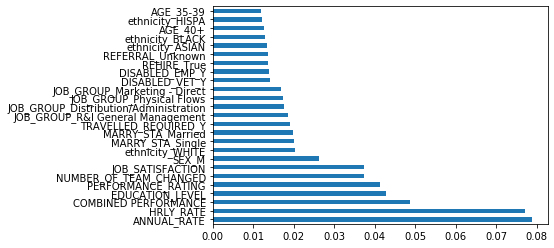

In [262]:
#EXTRA TREE CLASSIFICATION
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(df_stn,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=df_stn.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [263]:
new_one_all = pd.DataFrame(feat_importances.nlargest(20))
new_one_all.index

Index(['ANNUAL_RATE', 'HRLY_RATE', 'COMBINED PERFORMANCE', 'EDUCATION_LEVEL',
       'PERFORMANCE_RATING', 'NUMBER_OF_TEAM_CHANGED', 'JOB_SATISFACTION',
       'SEX_M', 'ethnicity_WHITE', 'MARRY_STA_Single', 'MARRY_STA_Married',
       'TRAVELLED_REQUIRED_Y', 'JOB_GROUP_R&I General Management',
       'JOB_GROUP_Distribution/Administration', 'JOB_GROUP_Physical Flows',
       'JOB_GROUP_Marketing - Direct', 'DISABLED_VET_Y', 'DISABLED_EMP_Y',
       'REHIRE_True', 'REFERRAL_Unknown'],
      dtype='object')

In [264]:
new_one_all = df_stn[['ANNUAL_RATE', 'HRLY_RATE', 'COMBINED PERFORMANCE', 'EDUCATION_LEVEL',
       'PERFORMANCE_RATING', 'NUMBER_OF_TEAM_CHANGED', 'JOB_SATISFACTION',
       'SEX_M', 'ethnicity_WHITE', 'MARRY_STA_Married', 'MARRY_STA_Single',
       'TRAVELLED_REQUIRED_Y', 'JOB_GROUP_Physical Flows',
       'JOB_GROUP_R&I General Management', 'JOB_GROUP_Marketing - Direct',
       'JOB_GROUP_Distribution/Administration', 'ethnicity_ASIAN',
       'REFERRAL_Unknown', 'DISABLED_VET_Y', 'REHIRE_True']]

In [265]:
vif_full_ens = pd.DataFrame()
vif_full_ens["variables"] = new_one_all.columns
vif_full_ens["VIF"] = [variance_inflation_factor(new_one_all.values, i) for i in range(new_one_all.shape[1])]

In [266]:
vif_full_ens

,variables,VIF
0,ANNUAL_RATE,196.360280
1,HRLY_RATE,196.330708
2,COMBINED PERFORMANCE,1.505267
3,EDUCATION_LEVEL,1.054137
4,PERFORMANCE_RATING,1.447423
5,NUMBER_OF_TEAM_CHANGED,2.554571
6,JOB_SATISFACTION,2.557886
7,SEX_M,1.001702
8,ethnicity_WHITE,1.352563
9,MARRY_STA_Married,2.396362


# FEATURE SELECTION ON COLUMNS AFTER BACKWARD ELIMINATION

In [267]:
len(new_df.columns)

48

C:\Users\risha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


[6.15242658e-01 1.39456584e-01 1.90040971e-02 1.73029188e-02
 1.30402634e-03 1.34994302e-03 1.06940975e-03 1.02601109e-03
 2.52926617e-03 3.53816031e-03 2.78583771e-03 9.56891919e-04
 2.88775001e-03 1.83213184e-02 3.58786979e-03 6.15317202e-03
 3.59781091e-03 7.17818297e-04 3.71104960e-03 1.81436115e-03
 6.37852996e-03 1.99220690e-03 3.16649495e-03 2.35145154e-04
 4.35337206e-03 1.42918405e-03 3.07447303e-03 4.28489724e-03
 2.42242405e-03 1.75855502e-02 2.90654128e-03 3.06218303e-03
 4.88775945e-03 1.79934891e-02 7.63191441e-03 3.84879213e-03
 6.05315029e-03 1.56569434e-03 2.24164455e-03 5.08262000e-03
 3.06718252e-03 1.84283474e-02 3.04649302e-03 6.08146910e-03
 2.33155548e-03 1.15987204e-03 9.99501710e-03 9.33704240e-03]


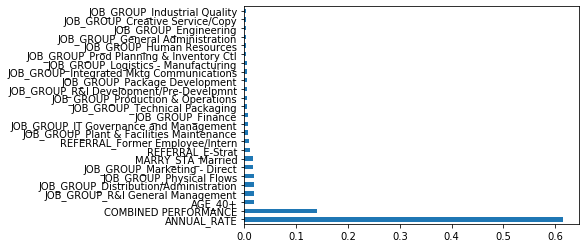

In [268]:
#EXTRA TREE CLASSIFICATION
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(new_df,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=new_df.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [269]:
feat_importances.nlargest(20)



ANNUAL_RATE                                 0.615243
COMBINED PERFORMANCE                        0.139457
AGE_40+                                     0.019004
JOB_GROUP_R&I General Management            0.018428
JOB_GROUP_Distribution/Administration       0.018321
JOB_GROUP_Physical Flows                    0.017993
JOB_GROUP_Marketing - Direct                0.017586
MARRY_STA_Married                           0.017303
REFERRAL_E-Strat                            0.009995
REFERRAL_Former Employee/Intern             0.009337
JOB_GROUP_Plant & Facilities Maintenance    0.007632
JOB_GROUP_IT Governance and Management      0.006379
JOB_GROUP_Finance                           0.006153
JOB_GROUP_Technical Packaging               0.006081
JOB_GROUP_Production & Operations           0.006053
JOB_GROUP_R&I Development/Pre-Develpmnt     0.005083
JOB_GROUP_Package Development               0.004888
JOB_GROUP_Integrated Mktg Communications    0.004353
JOB_GROUP_Logistics - Manufacturing         0.

In [270]:
new_one = pd.DataFrame(feat_importances.nlargest(20))

In [271]:
new_one.index

Index(['ANNUAL_RATE', 'COMBINED PERFORMANCE', 'AGE_40+',
       'JOB_GROUP_R&I General Management',
       'JOB_GROUP_Distribution/Administration', 'JOB_GROUP_Physical Flows',
       'JOB_GROUP_Marketing - Direct', 'MARRY_STA_Married', 'REFERRAL_E-Strat',
       'REFERRAL_Former Employee/Intern',
       'JOB_GROUP_Plant & Facilities Maintenance',
       'JOB_GROUP_IT Governance and Management', 'JOB_GROUP_Finance',
       'JOB_GROUP_Technical Packaging', 'JOB_GROUP_Production & Operations',
       'JOB_GROUP_R&I Development/Pre-Develpmnt',
       'JOB_GROUP_Package Development',
       'JOB_GROUP_Integrated Mktg Communications',
       'JOB_GROUP_Logistics - Manufacturing',
       'JOB_GROUP_Prod Planning & Inventory Ctl'],
      dtype='object')

In [272]:
new_one = df_stn[['ANNUAL_RATE', 'COMBINED PERFORMANCE',
       'JOB_GROUP_R&I General Management',
       'JOB_GROUP_Distribution/Administration', 'AGE_40+', 'MARRY_STA_Married',
       'JOB_GROUP_Physical Flows', 'JOB_GROUP_Marketing - Direct',
       'REFERRAL_E-Strat', 'REFERRAL_Former Employee/Intern',
       'JOB_GROUP_Plant & Facilities Maintenance',
       'JOB_GROUP_IT Governance and Management',
       'JOB_GROUP_Technical Packaging', 'JOB_GROUP_Production & Operations',
       'JOB_GROUP_Finance', 'JOB_GROUP_R&I Development/Pre-Develpmnt',
       'JOB_GROUP_Package Development', 'JOB_GROUP_Logistics - Manufacturing',
       'JOB_GROUP_Integrated Mktg Communications',
       'JOB_GROUP_Prod Planning & Inventory Ctl']]

In [273]:
vif_full_new = pd.DataFrame()
vif_full_new["variables"] = new_one.columns
vif_full_new["VIF"] = [variance_inflation_factor(new_one.values, i) for i in range(new_one.shape[1])]

In [274]:
vif_full_new

,variables,VIF
0,ANNUAL_RATE,1.241787
1,COMBINED PERFORMANCE,1.044979
2,JOB_GROUP_R&I General Management,1.031909
3,JOB_GROUP_Distribution/Administration,1.039974
4,AGE_40+,1.025901
5,MARRY_STA_Married,1.025599
6,JOB_GROUP_Physical Flows,1.168027
7,JOB_GROUP_Marketing - Direct,1.086484
8,REFERRAL_E-Strat,1.005282
9,REFERRAL_Former Employee/Intern,1.004215


In [275]:
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(new_one, Y, test_size=0.33, random_state=42)

In [276]:
from sklearn.decomposition import PCA
pca_fs = PCA(0.90)
pca_fs.fit(X_train_fs)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [277]:
X_train_fs = pca_fs.transform(X_train_fs)
X_test_fs = pca_fs.transform(X_test_fs)

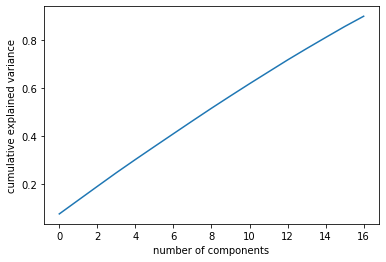

In [278]:
plt.plot(np.cumsum(pca_fs.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [279]:
X_train_fs

array([[ 3.32130104, -0.1514835 ,  1.79784566, ..., -0.49705818,
         0.53327398, -0.15934691],
       [-2.33890118, -0.26046035,  0.13052322, ...,  1.09056527,
        -0.89171109, -0.71542195],
       [-1.45333782,  0.22578514, -0.2606292 , ..., -0.20394357,
         0.13307885, -1.23161627],
       ...,
       [ 0.82384968,  0.07635302, -1.1413003 , ..., -0.30986468,
         0.46887618, -0.13809701],
       [-0.09764639,  0.13198222,  0.18807875, ...,  0.52132147,
        -0.25435361, -0.8856623 ],
       [-2.02198631,  0.07572894,  0.99615329, ...,  0.30001347,
        -0.0149564 , -0.02206333]])

# LOG REGRESSION POST FEATURE SELECTION

In [280]:
lg = LogisticRegression(C = 0.01, solver = 'lbfgs', max_iter = 1000)
lg.fit(X_train_fs, y_train_fs)

C:\Users\risha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [281]:
fs_predict = lg.predict(X_test_fs)

In [282]:
print(confusion_matrix(y_test_fs,fs_predict))
print(classification_report(y_test_fs,fs_predict))
print("acc",accuracy_score(y_test_fs,fs_predict))

[[1541  256]
 [ 814  561]]
              precision    recall  f1-score   support

           0       0.65      0.86      0.74      1797
           1       0.69      0.41      0.51      1375

    accuracy                           0.66      3172
   macro avg       0.67      0.63      0.63      3172
weighted avg       0.67      0.66      0.64      3172

acc 0.6626733921815889


# RF POST FEATURE SELECTION

In [283]:
RF_FS=RandomForestClassifier().fit(X_train_fs,y_train_fs)
rf_predict=RF_FS.predict(X_test_fs)

C:\Users\risha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [284]:
print(confusion_matrix(y_test_fs,rf_predict))
print(classification_report(y_test_fs,rf_predict))
print("acc",accuracy_score(y_test_fs,rf_predict))

[[1254  543]
 [ 574  801]]
              precision    recall  f1-score   support

           0       0.69      0.70      0.69      1797
           1       0.60      0.58      0.59      1375

    accuracy                           0.65      3172
   macro avg       0.64      0.64      0.64      3172
weighted avg       0.65      0.65      0.65      3172

acc 0.6478562421185372


# XGBOOST POST FEATURE SELECTION

In [285]:
model_GB = XGBClassifier()
model_GB.fit(X_train_fs, y_train_fs)

C:\Users\risha\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\risha\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [286]:
xg_fs_predict = model_GB.predict(X_test_fs)

In [287]:
print(confusion_matrix(y_test_fs,xg_fs_predict))
print(classification_report(y_test_fs,xg_fs_predict))
print("acc",accuracy_score(y_test_fs,xg_fs_predict))

[[1404  393]
 [ 635  740]]
              precision    recall  f1-score   support

           0       0.69      0.78      0.73      1797
           1       0.65      0.54      0.59      1375

    accuracy                           0.68      3172
   macro avg       0.67      0.66      0.66      3172
weighted avg       0.67      0.68      0.67      3172

acc 0.6759142496847415


# SVC POST FEATURE SELECTION

In [288]:
classifier_svm_fs_kernel = SVC(C=5.0,kernel='rbf', gamma=0.12,tol=0.00001)
classifier_svm_fs_kernel.fit(X_train_fs,y_train_fs)


C:\Users\risha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=5.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.12, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=1e-05, verbose=False)

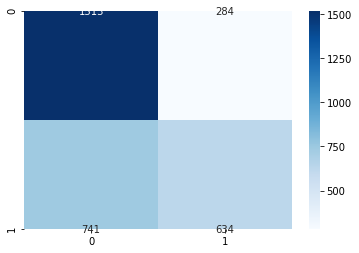

In [289]:
svm_fs_pred = classifier_svm_fs_kernel.predict(X_test_fs)
sns.heatmap(confusion_matrix(y_test_fs,svm_fs_pred),annot=True,fmt='g',cmap='Blues')

In [290]:
print(confusion_matrix(y_test_fs,svm_fs_pred))
print(classification_report(y_test_fs,svm_fs_pred))
print("acc",accuracy_score(y_test_fs,svm_fs_pred))

[[1513  284]
 [ 741  634]]
              precision    recall  f1-score   support

           0       0.67      0.84      0.75      1797
           1       0.69      0.46      0.55      1375

    accuracy                           0.68      3172
   macro avg       0.68      0.65      0.65      3172
weighted avg       0.68      0.68      0.66      3172

acc 0.676860025220681


In [291]:
print('Variance ratio of each pc:\n', pca_fs.explained_variance_ratio_, '\n')
print('Explained variance of each pc:\n', pca_fs.explained_variance_, '\n')
print('Selected {} pcs'.format(pca_fs.n_components_))

Variance ratio of each pc:
 [0.07504067 0.05762687 0.05748969 0.05713348 0.05510541 0.05410897
 0.05376822 0.05356255 0.05289106 0.05159915 0.05085213 0.04970389
 0.04961007 0.04752216 0.04632218 0.04579818 0.04307952] 

Explained variance of each pc:
 [1.50014601 1.15202495 1.14928247 1.14216162 1.10161824 1.0816983
 1.0748862  1.07077475 1.05735076 1.03152413 1.01659048 0.99363571
 0.99176014 0.95002062 0.92603174 0.91555627 0.86120729] 

Selected 17 pcs


In [292]:
df_comp = pd.DataFrame(pca_fs.components_,columns = new_one.columns)

In [293]:
df_comp

,ANNUAL_RATE,COMBINED PERFORMANCE,JOB_GROUP_R&I General Management,JOB_GROUP_Distribution/Administration,AGE_40+,MARRY_STA_Married,JOB_GROUP_Physical Flows,JOB_GROUP_Marketing - Direct,REFERRAL_E-Strat,REFERRAL_Former Employee/Intern,JOB_GROUP_Plant & Facilities Maintenance,JOB_GROUP_IT Governance and Management,JOB_GROUP_Technical Packaging,JOB_GROUP_Production & Operations,JOB_GROUP_Finance,JOB_GROUP_R&I Development/Pre-Develpmnt,JOB_GROUP_Package Development,JOB_GROUP_Logistics - Manufacturing,JOB_GROUP_Integrated Mktg Communications,JOB_GROUP_Prod Planning & Inventory Ctl
0,0.625901,-0.364518,0.026120,-0.159077,-0.044978,-0.014337,-0.250314,0.305687,0.028086,-0.001913,-0.049355,0.087104,0.073204,-0.467779,0.178058,0.113882,0.090261,-0.021431,0.016653,-0.050076
1,-0.006287,0.053446,0.005888,0.053641,-0.007871,-0.100037,0.029257,0.015159,-0.077573,-0.010716,-0.000675,-0.008127,0.005317,-0.184301,0.008771,-0.027263,-0.007890,0.013020,0.003570,0.970453
2,0.037771,0.045075,0.007934,0.166440,0.646504,0.604720,-0.111450,0.110579,-0.110786,0.189354,0.085086,0.046845,-0.261587,-0.039125,0.070507,-0.083053,0.024588,0.116475,-0.072136,0.041348
3,-0.049365,0.067114,0.058881,0.265485,0.122813,0.120007,0.555543,-0.199537,0.331268,-0.278147,-0.013248,0.049742,0.146419,-0.537304,0.022122,0.164601,0.004610,0.068333,0.005568,-0.094815
4,0.091776,-0.077695,0.043467,-0.212149,0.174320,0.137322,-0.309238,-0.633089,0.242950,-0.116943,-0.035171,0.104037,0.252388,0.241763,0.259904,0.315228,0.063787,-0.014104,-0.004890,0.121856
5,0.016663,0.110490,-0.003037,0.718635,-0.012759,-0.112847,-0.426995,-0.012393,-0.115495,-0.041619,-0.018753,-0.010884,0.468617,-0.038447,0.036329,-0.147142,-0.013435,0.104808,0.005787,-0.070014
6,-0.001389,0.102129,-0.049268,-0.386232,0.013018,0.137013,0.219899,-0.075783,-0.167567,0.347898,0.119617,0.002698,0.604966,-0.121395,0.120509,-0.431576,-0.017744,0.135246,-0.026631,-0.026092
7,-0.004320,-0.031000,0.044736,0.202373,-0.096261,-0.221243,0.110260,-0.322393,-0.192241,0.318193,0.094843,-0.004732,-0.343981,-0.141830,0.652308,-0.122645,0.001854,-0.223331,0.007729,-0.074889
8,0.039765,0.142483,0.025757,-0.106365,-0.132714,-0.074240,-0.051105,-0.063874,-0.103840,-0.229412,-0.095163,0.005339,-0.232403,-0.014772,0.217972,-0.077253,0.031752,0.867735,0.029039,-0.036076
9,-0.038136,-0.042992,-0.044360,0.070375,-0.102050,-0.028887,0.021796,-0.120428,-0.257099,0.507908,0.242020,-0.074916,0.049835,-0.130767,-0.263330,0.646096,-0.028453,0.258891,-0.018070,-0.027698


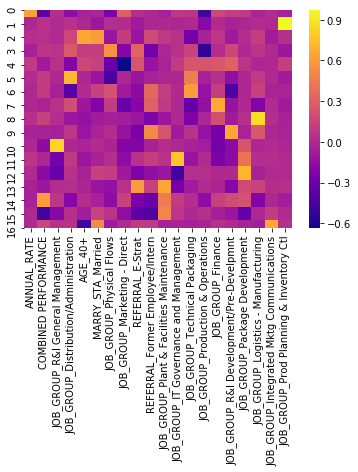

In [294]:
sns.heatmap(df_comp,cmap='plasma')

In [295]:
pca_fs.explained_variance_

array([1.50014601, 1.15202495, 1.14928247, 1.14216162, 1.10161824,
       1.0816983 , 1.0748862 , 1.07077475, 1.05735076, 1.03152413,
       1.01659048, 0.99363571, 0.99176014, 0.95002062, 0.92603174,
       0.91555627, 0.86120729])

In [296]:
pca_comps = np.cumsum(pca_fs.explained_variance_ratio_)*100

In [297]:
cum_pca = pd.DataFrame(pca_comps,columns=["Cumulative PCA explained"])

In [298]:
cum_pca

,Cumulative PCA explained
0,7.504067
1,13.266754
2,19.015722
3,24.729071
4,30.239612
5,35.650510
6,41.027331
7,46.383587
8,51.672692
9,56.832607


Text(0, 0.5, 'cumulative explained variance')

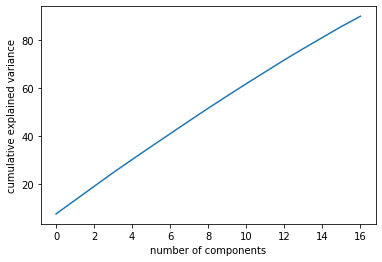

In [299]:
plt.plot(cum_pca)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

# GRID SEARCH WITH VOTING CLASSIFIER

In [300]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

VT.fit(X_train,y_train)
predicted=VT.predict(X_test)
print (accuracy_score(predicted,y_test))
model2 = SVC()
model3=LogisticRegression(n_jobs=-1)
model4=XGBClassifier()

predictors=[('SVM',model2),('LR',model3),('xgb',model4)]

VT=VotingClassifier(predictors)
#======================================================================================

#build the parameter grid
LREG_grid = [ {'C':[0.5,0.9,1,1.5,2],'penalty':['l1','l2'],'solver':['liblinear']}]

#build a grid search to find the best parameters
gridsearchLREG  = GridSearchCV(model3, LREG_grid, cv=5)

#run the grid search
gridsearchLREG.fit(X_train,y_train)

#=======================================================================================
xgb_grid=[{'max_depth':[4,5,6,7,8,9],'learning_rate':[0.1,0.2,0.3,0.4,0.5]}]


gridsearchXGB=GridSearchCV(model4, xgb_grid, cv=5)
gridsearchXGB.fit(X_train,y_train)

#=======================================================================================
svc_grid=[{'C':[0.1,1,1.5,2,2.5],'degree':[1,2,3,4]}]
gridsearcgsvc=GridSearchCV(model2,svc_grid,cv=5)
gridsearchLREG.fit(X_train,y_train)


C:\Users\risha\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\risha\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7122052704576977


C:\Users\risha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\risha\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\risha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\risha\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.5, 0.9, 1, 1.5, 2], 'penalty': ['l1', 'l2'],
                          'solver': ['liblinear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [301]:
VT.fit(X_train,y_train)
predicted=VT.predict(X_test)

C:\Users\risha\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\risha\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [302]:
print ("Accuracy",accuracy_score(predicted,y_test))


Accuracy 0.7122052704576977


[[1358  267]
 [ 563  696]]
              precision    recall  f1-score   support

           0       0.71      0.84      0.77      1625
           1       0.72      0.55      0.63      1259

    accuracy                           0.71      2884
   macro avg       0.71      0.69      0.70      2884
weighted avg       0.71      0.71      0.71      2884



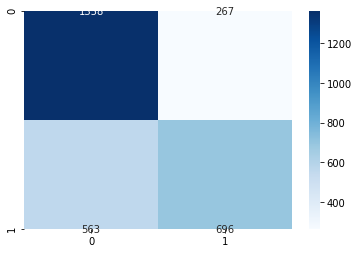

In [304]:
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))
sns.heatmap(confusion_matrix(y_test,predicted),annot=True,fmt='g',cmap='Blues')